In [2]:
import numpy as np
import xarray as xr
import pandas as pd 
import seaborn as sns
from scipy import optimize
from scipy import interpolate
import matplotlib.pyplot as plt 

In [3]:
with xr.open_dataset('nc/twds-b_1000a_dt_1_dx_500_MB_10.8_OFF_25a_0.0001_B_recovery.nc') as src: 
    # correct for minimum ice thickness
    src["depth"] = xr.where(src.depth <= 10, 0, src.depth)
    # apply sigma coordinate transform for vertical coordinate
    src["Z"]     = src.zbed + src.Z * src.height 
    # Calculate the magnitude of the velocity vectors
    src['vel_m'] = np.sqrt(src['velocity 1']**2 + src['velocity 2']**2)    
    
Vol = src.height.isel(coord_2=-1).integrate("coord_1") /\
      src.height.isel(coord_2=-1).isel(t=0).integrate("coord_1")

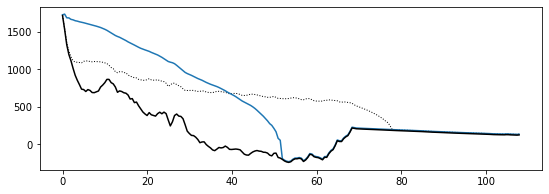

In [4]:
fig, ax = plt.subplots(figsize=(9,3))

ax.plot(src.coord_1[::-1]/1000.,
        src.isel(t=0,coord_2=-1).Z,
        color='k', ls=':', lw=1.0, label=r'$z_{\rm s}(t=0)$')


ax.plot(src.coord_1[::-1]/1000.,
        src.isel(t=-1,coord_2=-1).Z,
        color='tab:blue',
        label="Cuffey and Paterson, (2010)")

ax.plot(src.coord_1[::-1]/1000.,
        src.isel(t=0,coord_2=-1).zbed,
        color='k', label=r'$z_{\rm b}$ - Flowline B')


# plt.savefig('test_spline_MB_10.0_OFF.png', dpi=300, 
#             bbox_inches='tight', facecolor='w')

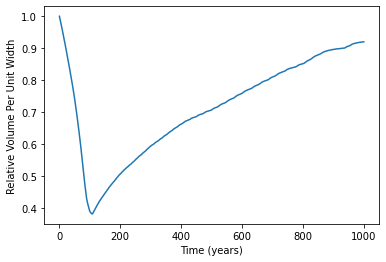

In [5]:
fig, ax = plt.subplots()

ax.plot(Vol.t, Vol)

ax.set_ylabel('Relative Volume Per Unit Width')
ax.set_xlabel('Time (years)')

fig.savefig('/Users/andrewnolan/Desktop/recovery_V.png', dpi = 300, 
            bbox_inches='tight', facecolor='w')

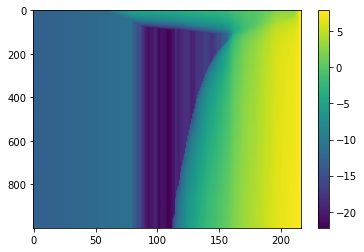

In [6]:
plt.imshow(src["zs accumulation flux 2"].isel(coord_2=-1), aspect='auto')
plt.colorbar()

In [15]:
np.where(src["zs accumulation flux 2"].isel(coord_2=-1, t=-1).diff('coord_1').values>0)[0][0]

156

In [16]:
src["Z"].isel(coord_2=-1, t=0, coord_1=156)

<xarray.DataArray 'Z' ()>
array(616.9122, dtype=float32)
Coordinates:
    coord_1  float32 7.782e+04
    coord_2  float32 1.0
    t        float32 1.0